In [185]:
#import
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print("done")

done


In [186]:
# loading dataset
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()
print("done")

done


In [187]:
xtrain = xtrain/255
xtest = xtest/255

In [188]:
len(xtrain)

60000

In [189]:
len(xtest)

10000

In [190]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

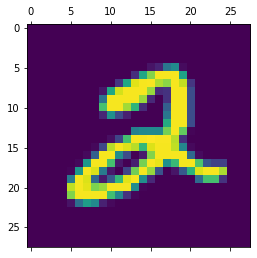

In [191]:
plt.matshow(xtrain[5])

In [192]:
#flattening the data 
flattendxtrain=xtrain.reshape(len(xtrain),28*28)
flattendxtest=xtest.reshape(len(xtest),28*28)


In [193]:
flattendxtrain.shape


(60000, 784)

In [194]:
flattendxtest.shape

(10000, 784)

In [195]:
#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    # Check accuracy
    if(logs.get('accuracy') > 1.0 ):

      # Stop if threshold is met
      print("\nAccuracy is lower than 1.0 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [196]:
#model
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(
    optimizer ='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(flattendxtrain,ytrain,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9125 - accuracy: 0.7314
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4041 - accuracy: 0.8874
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3492 - accuracy: 0.9007
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3244 - accuracy: 0.9072
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3089 - accuracy: 0.9117


In [197]:
model.evaluate(flattendxtest,ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.2909 - accuracy: 0.9161


[0.29090461134910583, 0.916100025177002]

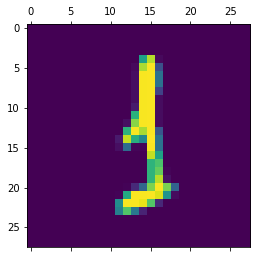

In [223]:
plt.matshow(xtest[900])

In [217]:
ypredicted=model.predict(flattendxtest)

In [224]:
np.argmax(ypredicted[900])

1